# Chapter 7. 군집화

## 1. K-평균 알고리즘 이해

- K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘이다.
- K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선책하는 군집화 기법이다.
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균지점으로 이동하는 프로세스를 반복적으로 수행한다.
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법이다.

#### 알고리즘 동작 순서
1. 먼저 군집화의 기준이 되는 중심점을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다. 전체 데이터를 2개로 군집화하려면 2개의 중심을 임의의 위치로 가져다 놓는 것이다.
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다.
3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동한다.
4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경한다.
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동한다.
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화 종료. 그렇지 않다면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복한다

#### K- 평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
- 알고리즘이 쉽고 간결하다.

#### K-평균의 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다. (이를 위해 PCA로 차원 축소를 적용해야 할 수도 있다.)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어렵다.

### 사이킷런 KMeans 클래스 소개
- K-평균을 구현하기 위해 KMeans 클래스를 제공

- class sklearn.cluster.Kmeans()

- 중요 파라미터는 다음과 같다.
    - KMeasns 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미한다.
    - init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정한다.
    - max_iter는 최대 반복횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
    
- KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit() 또는 fit_transform() 매서드를 이용해 수행하면 된다. 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수가 있다.
    - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_ : 각 군집 중심점 좌표(Shape는 [군집개수, 피처개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있다.

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- 3개의 군집으로 분류되어 소속되었음을 알 수 있다.

In [5]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


#### 붓꽃 데이터 세트의 군집화 시각화
- 4개 속성을 2개로 차원 축소한 뒤에 X, Y 좌표로 개별 데이터를 표현

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


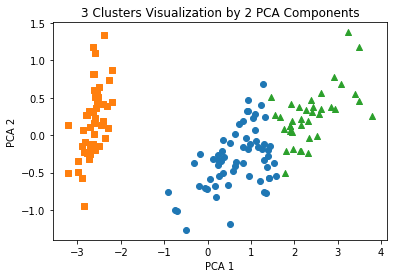

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- cluster 1을 나타내는 네모(주황)는 명확히 다른 군집과 잘 분리되어 있다.
- 하지만 cluster 0을 나타내는 동그라미(파랑)과 cluster 2를 나타내는 세모(초록)은 명확하게 분리되어 있지 않음을 알 수 있다.

### 군집화 알고리즘 테스트를 위한 데이터 생성 
- 사이킷런에서 다양한 유형의 군집화 알고리즘을 테스트해보기 위한 데이터 생성기를 제공한다.
- make_blobs()와 maske_classification() API 제공


- make_blobs() 호출 파라미터
    - n_samples : 생성할 총 데이터 개수
    - n_features : 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현한다.
    - centers : int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타낸다.
    - cluster_std : 생성될 군집 데이터의 표준 편차를 의미한다.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


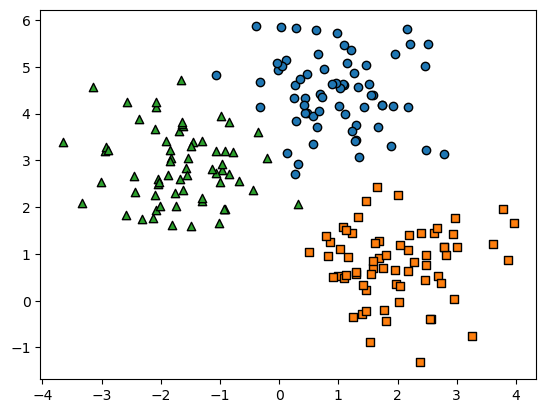

In [9]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show()

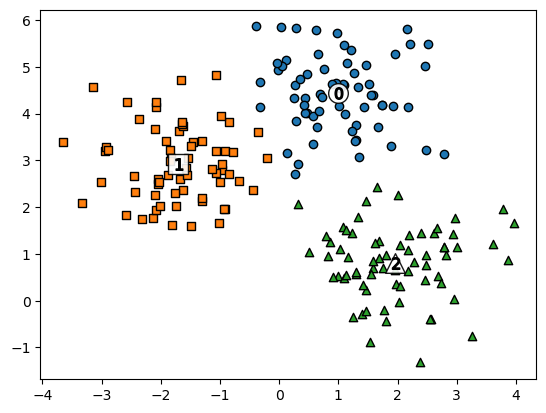

In [10]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()


In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
